# Réponse impulsionnelle et fonctions de transfert pour des signaux discrets

Ce TP est une introduction, très élémentaire, à l'analyse d'un filtrage, et en particulier aux notions de réponse impulsionnelle, convolution, représentation fréquentielle, fonction de transfert. 

Dans ces exercices, on travaillera bien entendu avec des signaux échantillonnés. Les expérimentations seront réalisées sous Python. 


On considère la relation de ﬁltrage décrite par l’équation aux différences suivante : $$y(n)=a y(n-1) + x(n)$$
où $x(n)$ est l’entrée du ﬁltre et $y(n)$ sa sortie.

## 1. Etude temporelle

1. Calculez la réponse impulsionnelle (RI), sur le papier, en fonction de a, en supposant le système causal,
et les conditions initiales éventuelles nulles.
2. Sous Python, consultez l’aide de la fonction lfilter, par help(lfilter) et tachez d’en comprendre le
fonctionnement. Proposez à l’enseignant une méthode pour calculer numériquement la RI du ﬁltre, puis
contrôlez graphiquement l’allure de la RI, avec a = 0:8. On rappelle que la fonction dirac permet de
générer une impulsion de Dirac à temps discret.
3. Calculez et visualisez les RI pour $a=-0.8$, $a=0.99$, et $a=1.01$. Conclusions.

In [1]:
from pylab import *

On commence par créer une fonction qui rend une **impulsion de Dirac**, et on teste le résultat

In [2]:
def dirac(n):
    """ dirac(n):
    Rend une impulsion de Dirac de longueur n """
    
    
    return d

x=range(10)
x[2]


2

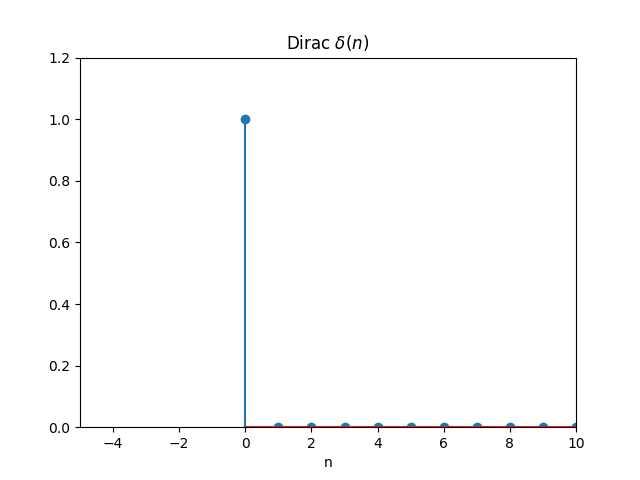

In [3]:
# Représentation
N=100
stem(range(N),dirac(N))
title("Dirac $\delta(n)$")
xlabel("n")
ylim([0, 1.2])    # Pour mieux voir l'impulsion
xlim([-5, 10])

show()

### La fonction scipy.signal *lfilter()*

In [6]:
import scipy
from scipy.signal import lfilter
help(lfilter)


Help on function lfilter in module scipy.signal.signaltools:

lfilter(b, a, x, axis=-1, zi=None)
    Filter data along one-dimension with an IIR or FIR filter.
    
    Filter a data sequence, `x`, using a digital filter.  This works for many
    fundamental data types (including Object type).  The filter is a direct
    form II transposed implementation of the standard difference equation
    (see Notes).
    
    The function `sosfilt` (and filter design using ``output='sos'``) should be
    preferred over `lfilter` for most filtering tasks, as second-order sections
    have fewer numerical problems.
    
    Parameters
    ----------
    b : array_like
        The numerator coefficient vector in a 1-D sequence.
    a : array_like
        The denominator coefficient vector in a 1-D sequence.  If ``a[0]``
        is not 1, then both `a` and `b` are normalized by ``a[0]``.
    x : array_like
        An N-dimensional input array.
    axis : int, optional
        The axis of the input da

En identifiant les paramètres, on voit que filtrer un signal quelconque $x$ suivant l'équation $y(n)=a y(n-1)+x(n)$ correspond à utiliser la commande _y=lfilter([1],[1, -a],x)_, où bien entendu x et a ont été initialisés au préalable.
Pour obtenir la réponse impulsionnelle, il suffit de mettre en entrée du système **une impulsion !**

In [7]:
a=0.8
N=100
x=
y=
stem(y), 
#title("Réponse impulsionnelle pour a={}".format(a)), xlabel("n")

(<StemContainer object of 3 artists>,)

Les premières valeurs sont :

In [8]:
print("Premières valeurs \n y[:6]=" , y[:6])
print("que l'on compare à a**n :\n", a**arange(0,6))


Premières valeurs 
 y[:6]= [1.      0.8     0.64    0.512   0.4096  0.32768]
que l'on compare à a**n :
 [1.      0.8     0.64    0.512   0.4096  0.32768]


On constate donc que la RI "_expérimentale_" correspond bien à la RI prévue théoriquement, à savoir $h(n)=a^n$. 

On va le contrôler pour d'autres valeurs de $a$. 

Pour ne pas trop s'embêter, on va définir une fonction qui renvoir la RI, pour deux vecteurs [b] et [a] quelconque décrinat le filtre. Il suffit de calculer la sortie du filtre avec comme entrée un Dirac, sur une longueur spécifiée :


In [9]:
def ri(b,a,n):
    u""" Rend la 
    réponse impulsionnelle de longueur 
    n (n entier) d'un filtre de coefficients b,a
    \n
    Attention : b et a _doivent_ être des arrays ou 
    des listes -- si b=1, entrer b=[1]"""
    return lfilter(b,a,dirac(n))

Affichage
---------

In [10]:
N=25
axe_n=range(N)
a=-0.8
figure()
stem(axe_n,ri([1],[1, -a],N))
title("Réponse impulsionnelle pour a={}".format(a))
xlabel("n")
#
N=200
axe_n=range(N)
a=0.99
figure()
stem(axe_n,ri([1],[1, -a],N))
title("Réponse impulsionnelle pour a={}".format(a))
xlabel("n")
#
a=1.01
figure()
stem(axe_n,ri([1],[1, -a],N))
title("Réponse impulsionnelle pour a={}".format(a))
xlabel("n")

Text(0.5, 0, 'n')

Conclusions : 

* Pour $a<0$, la RI qui est théoriquement $a^n$ est effectivement _alternée_

* pour $a$ proche de 1, par valeur inférieur, la RI est presque constante

* pour $a>1$, la RI diverge...

## 2. Etude fréquentielle

2. Donnez l’expression de la fonction de transfert $H(f)$, puis de $|H(f)|$ pour $a$ quelconque. Précisez les amplitudes théoriques en $f = 0$ et $f = 1/2$ (en fréquence réduite, _i.e._ normalisée par rapport à Fe. Sous Matlab, calculez la FT du ﬁltre en prenant la TF (fonction tfd) de la RI, pour a = 0.8 et a = −0.8, et visualisez les résultats. Conclusions.

In [11]:
# On aura besoin des fonctions fft
from numpy.fft import fft, ifft, fftshift

# Calcul d'une réponse impusionnelle
a=0.8
h=ri([1],[1, -a],300)

# Calcul de la réponse en fréquence
M=1000
Fe=32
H=
f=arange(M)/M*Fe -Fe/2 # Définition de l'axe des fréquences, entre -Fe/2 et Fe/2, sur M points

#print(abs(H))

fig=figure(4)   # Et affichage
subplot(2,1,1)
plot(f,abs(H),label=u"Réponse en fréquence")
xlabel(u"Fréquence")
#title("Réponse en fréquence (module)")
grid(b=True)
xlim([-Fe/2, Fe/2])
subplot(2,1,2)
plot(f,angle(H),label=u"Réponse en fréquence")
xlabel(u"Fréquence")
#title("Réponse en fréquence (phase)")
grid(b=True)
xlim([-Fe/2, Fe/2])
fig.tight_layout()   # évide le recouvrement des titles et labels

In [12]:
# Valeur en f=x : on cherche par find(f==x)
import numpy as np
#print ("Valeur en 0 : ",H[find(f==0)].real)
#print ("Valeur en Fe/2 : ",H[find(f==-Fe/2)].real)
print ("Valeur en 0 : ",H[np.where(f==0)].real)
print ("Valeur en Fe/2 : ",H[np.where(f==-Fe/2)].real)
print ("A comparer avec les valeurs théoriques")

Valeur en 0 :  [5.]
Valeur en Fe/2 :  [0.55555556]
A comparer avec les valeurs théoriques


3. Filtrage 
============
1. Créez une sinusoïde x, à la fréquence f0 = 3, échantillonnée à Fe = 32, sur 128 points 

2. Filtrez cette sinusoïde par le ﬁltre précédent 

    – en utilisant la fonction filter, y1=lfilter([1],[1 -0.8],x); 

    – en utilisant une convolution, y2=lfilter(h,1,x); avec  $h$ la réponse impulsionnelle du ﬁltre avec $a = 0.8$ 

Expliquez pourquoi ce dernier calcul correspond effectivement à une convolution. Comparez ces deux résultats.

### 3.1. Analyse temporelle

In [13]:
# Création d'une petite sinusoïde
N, fo, Fe = 128, 3, 32
t=arange(N)/Fe
x=
figure(3)
plot(t,x)
xlabel("Temps")
grid(b=True)
ylim([-1.2, 1.2])

(-1.2, 1.2)

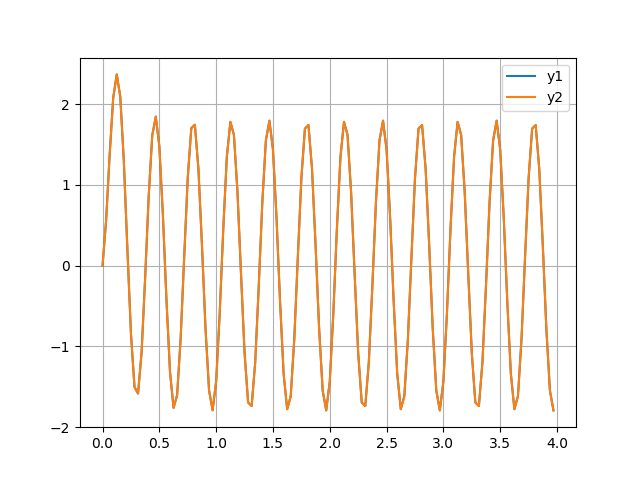

In [14]:
# Filtrée par le filtre h
a=0.8
h=ri([1],[1, -a],N) # recalculée sur N points
y1=
y2=
figure()
plot(t,y1,label='y1')
plot(t,y2,label='y2')
grid(b=True)
legend()
show()


On peut aussi afficher la différence des deux courbes, comme ça c'est clair !

In [15]:
figure()
plot(t,y1-y2,label='y1-y2')
xlabel("Temps")
grid(b=True)
legend()

On va maintenant vérifier le **théorème de Plancherel** qui indique que la TF du produit de convolution est le produit des TF. 
On observera simplement que la sortie calculée comme la TF inverse du produit de la fonction de transfert H et de la TF X
du signal d'entrée est identique (ou au moins très proche) de la sortie calculée par convolution/équations aux différences

In [16]:
y3=real(ifft(fft(h)*fft(x)))
plot(t,y3,label='y3')
plot(t,y2,label='y2')
legend()

La différence que l'on observe au début des deux signaux provient d'une différence d'hypothèse sur les valeurs du signal pour les temps négatifs. En réalité, la fonction _lfilter_ suppose le signal nul hors des données spécifiées, ce qui entraîne une réponse transitoire. La TF, calculée par la _fft_, suppose implicitement que les signaux sont périodiques, et donc périodisés, hors de l'intervalle d'observation. On reveindra là-dessus plus tard en cours. 

### 3.2 Représentation en fréquence :

In [17]:
X=
H=
M=len(x)
f=arange(M)/M*Fe -Fe/2 
plot(f,abs(H),color='green',label="H")
stem(f,abs(X)*6/M,markerfmt='b^',label="X")
xlim([-16, 16])
xlabel("Fréquence")
legend()

La sinusoïde est de fréquence $fo=3$. Mesurons les valeurs du gain et du déphasage à cette fréquence :

In [18]:
H3=H[np.where(f==3)]
print("Valeur du gain complexe :", H3)
print("Module :", abs(H3))
print("Phase (en degrés):", angle(H3)/pi*180)

Valeur du gain complexe : [1.08130406-1.43535659j]
Module : [1.79707178]
Phase (en degrés): [-53.00801337]


Puis, voyons ceci sur les courbes temporelles

In [19]:
figure()
plot(t,x,t,y3)
grid('on')

Mesure du déphasage : on mesure le retard entre les deux signaux

In [20]:
figure()
plot(t,x,label="x")
plot(t,y3,label="y3")
legend()
grid('on')
xlim([0, 0.4])

(0.0, 0.4)

In [21]:
deltaT=np.min(np.where(y3>0))/Fe    # x commence à zéro, le retard est donné par la première valeur où y3 devient >0
print("La valeur du déphasage, en degrés, est de ", (2*pi*fo)*deltaT/pi*180,"°")


La valeur du déphasage, en degrés, est de  67.5 °


**Observations** : On observe donc que si l'entrée est une sinusoïde, alors la sortie est également une sinusoïde, à un gain et déphasage près. Ce gain et ce déphasage correspondent exactement au gain et au déphasage apportés par la fonction de transfert en fréquence. 

***

On renouvelle l'expérience, avec cette fois-ci un train d'impulsions plutôt qu'un sinusoïde. Le but est simplement de constater que cette fois-ci, la sortie du filtre est déformée : seuls les sinus (et cos) sont invariants par filtrage linéaire -- ce sont les fonctions propres des systèmes linéaires. 

In [22]:
def rectpulse(x):
    """rectpulse(x): \n
    Renvoie un ndarray contenant un train d'impulsions\n
    rectangulaires, de période 2pi"""
    return sign(sin(x))    

In [23]:
x=rectpulse(2*pi*fo*t)
figure()
plot(t,x)
y=lfilter(h,[1],x)
figure()
plot(t,y)
grid(b=True)


Allez et pour le _fun_, on regarde ce que celà donne avec un rectangle plus large. On distingura en particulier temps de montée et de descente. 

In [24]:
f1=0.5
x=rectpulse(2*pi*f1*t)
y=(1-a)*lfilter(h,[1],x)    # Question subsidiaire: expliquez pourquoi on met ici un facteur (1-a) !
figure()
plot(t,y,label='y')
plot(t,x,label='x')
ylim([-1.2, 1.2])
grid(b=True)
title('Réponse du filtre à une entrée rectangulaire')

Text(0.5, 1.0, 'Réponse du filtre à une entrée rectangulaire')